In [3]:
#check data 

import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
#inspect datas

with uproot.open("../CERN2022-build/out_data/tbeamdata0000.root") as f:
    for k in f:
        print(k)
        try:
            for kk in f[k]:
                print(kk)
        except:
            pass
        
    #print(f.describe())


outData;1
<TBranch 'NEvent' at 0x7fd529b31650>
<TBranch 'Tracker_NHit_X_0' at 0x7fd529bf4350>
<TBranch 'Tracker_NHit_Y_0' at 0x7fd529b41450>
<TBranch 'Tracker_NHit_X_1' at 0x7fd529b42650>
<TBranch 'Tracker_NHit_Y_1' at 0x7fd529b43910>
<TBranch 'Tracker_X_0' at 0x7fd529b70dd0>
<TBranch 'Tracker_Y_0' at 0x7fd529b721d0>
<TBranch 'Tracker_X_1' at 0x7fd529b80310>
<TBranch 'Tracker_Y_1' at 0x7fd529b81690>
<TBranch 'GammaCal_EDep_CC' at 0x7fd529b70d50>
<TBranch 'GammaCal_EDep_TL' at 0x7fd529b83f90>
<TBranch 'GammaCal_EDep_TR' at 0x7fd529b4d2d0>
<TBranch 'GammaCal_EDep_BL' at 0x7fd529b4e5d0>
<TBranch 'GammaCal_EDep_BR' at 0x7fd529b4f8d0>
<TBranch 'GammaCal_EDep_CL' at 0x7fd529b48490>
<TBranch 'GammaCal_EDep_CR' at 0x7fd529b49d90>
<TBranch 'CrystalA_EDep' at 0x7fd529b4af50>
<TBranch 'CrystaB_EDep' at 0x7fd529b5c050>
<TBranch 'CrystalC_EDep' at 0x7fd529b5d390>
crossPos;1
<TBranch 'EvID' at 0x7fd529b5f2d0>
<TBranch 'Xcrossing' at 0x7fd529b5f290>
<TBranch 'Ycrossing' at 0x7fd529b69790>
<TBranch 'P

In [5]:
#%% Importo dati 

data_path = '../CERN2022-build/out_data/tbeamdata0000.root'

#data_path = '../Outputfiles/run_forphysics.root'

data = uproot.open(data_path)["outData"]

data_loss = uproot.open(data_path)["EnergyDep"]

ph_loss = np.array(data_loss['totEnergy'])

ph_crys  = np.array(data["CrystalA_EDep"])

print(data.keys())

print(data_loss.keys())


print(len(ph_loss))

print(data['NEvent'])


['NEvent', 'Tracker_NHit_X_0', 'Tracker_NHit_Y_0', 'Tracker_NHit_X_1', 'Tracker_NHit_Y_1', 'Tracker_X_0', 'Tracker_Y_0', 'Tracker_X_1', 'Tracker_Y_1', 'GammaCal_EDep_CC', 'GammaCal_EDep_TL', 'GammaCal_EDep_TR', 'GammaCal_EDep_BL', 'GammaCal_EDep_BR', 'GammaCal_EDep_CL', 'GammaCal_EDep_CR', 'CrystalA_EDep', 'CrystaB_EDep', 'CrystalC_EDep']
['EvID', 'PDGEncoding', 'ParticleID', 'totEnergy']
0
<TBranch 'NEvent' at 0x7fd5299cea50>


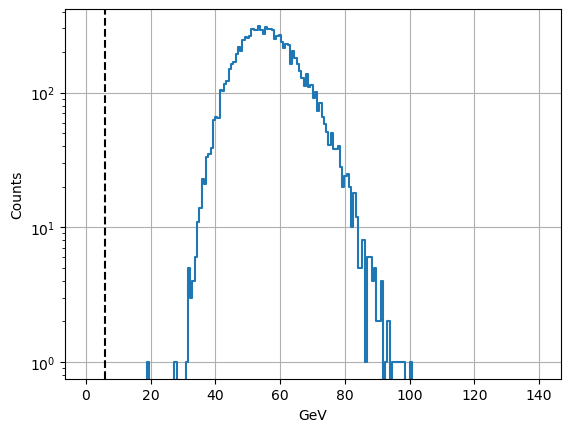

In [7]:
#ph = np.sum(np.array(data['GammaCal_EDep_CC']), np.array(data['GammaCal_EDep_CL']), np.array(data['GammaCal_EDep_CR']), np.array(data['GammaCal_EDep_BL']), np.array(data['GammaCal_EDep_BR'],
#np.array(data['GammaCal_EDep_TL']), np.array(data['GammaCal_EDep_TR'] )))

ph = np.array([sum(x) for x in zip(np.array(data['GammaCal_EDep_CC']), np.array(data['GammaCal_EDep_CL']), np.array(data['GammaCal_EDep_CR']), np.array(data['GammaCal_EDep_BL']), np.array(data['GammaCal_EDep_BR']),
np.array(data['GammaCal_EDep_TL']), np.array(data['GammaCal_EDep_TR'] ))])
#ph = np.array(data['GammaCal_EDep_CC'])


x0 = np.array(data['Tracker_X_0'])

y0 = np.array(data['Tracker_Y_0'])


x1 = np.array(data['Tracker_X_1'])

y1 = np.array(data['Tracker_Y_1'])


fig, ax = plt.subplots()

h, bins = np.histogram(ph, bins = 200, range = [0,140]) 

binc = bins[:-1]+(bins[1]-bins[0])/2

ax.plot(binc, h, ds = "steps-mid", label='Eergy deposit Gev random orientation')

ax.grid() 

ax.set_xlabel('GeV')

ax.set_ylabel('Counts')

ax.set_yscale('log')

ax.axvline(6, ls ='--', c = 'k', label = '120 GeV')

#ax.legend(loc = 'upper right')


/tmp/ipykernel_494972/3226274471.py:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


0


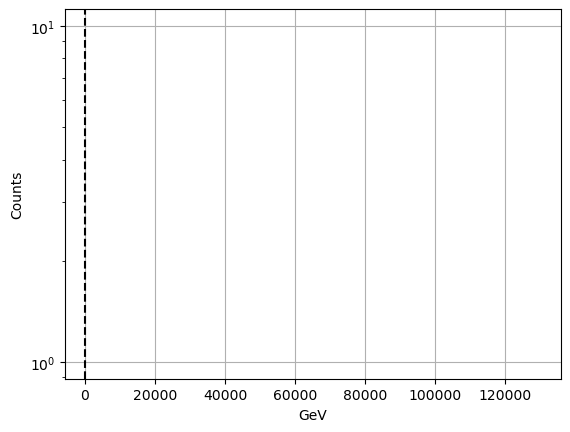

In [16]:
fig, ax = plt.subplots()

h, bins = np.histogram(ph_loss, bins = 100, range = [0,130000]) 

binc = bins[:-1]+(bins[1]-bins[0])/2

ax.plot(binc, h, ds = "steps-mid", label='Eergy deposit Gev random orientation')

ax.grid() 

ax.set_xlabel('GeV')

ax.set_ylabel('Counts')

ax.set_yscale('log')

ax.axvline(118, ls ='--', c = 'k')

print(len(ph_loss))


In [8]:
np.shape(ph)

(10000,)

In [18]:
ph_loss

array([], dtype=float64)

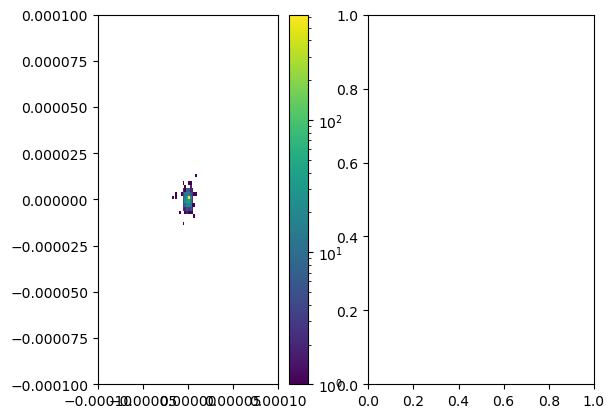

In [19]:
fig, ax = plt.subplots(1,2)

ax = ax.flatten()

hh = ax[0].hist2d(x0,y0,bins = 100, range = [[-0.0001,0.0001],[-0.0001,0.0001]], norm = mpl.colors.LogNorm())

fig.colorbar(hh[3], ax = ax[0])

#hh1 = ax[1].hist2d(x1,y1,bins = 100,range = [[-0.001,0.001],[-0.001,0.001]])

x0

x0
